In [1]:
import numpy as np
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [2]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    "pgf.rcfonts": False,
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    #"font.sans-serif": "Computer Modern Sans serif",
    #"font.serif": [],      
    "font.sans-serif": [],
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator
from scipy.integrate import quad
from scipy.special import gamma

In [4]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [5]:
# Read in bin data
data = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_1d_bins.csv')

In [6]:
data.head()

,bin_num,theta_x,theta_y,theta_cut_x,theta_cut_y,phi_x,phi_y,phi_cut_x,phi_cut_y,nu_x,nu_y,nu_cut_x,nu_cut_y
0,1,0.97015,0,0.97015,0,-22.275,0,-22.275,0,6,40656,6,14138
1,2,0.97045,0,0.97045,0,-21.825,0,-21.825,0,18,46925,18,16200
2,3,0.97075,0,0.97075,0,-21.375,0,-21.375,0,30,47682,30,16503
3,4,0.97105,0,0.97105,0,-20.925,0,-20.925,0,42,48152,42,16418
4,5,0.97135,0,0.97135,0,-20.475,0,-20.475,0,54,48427,54,16152


In [7]:
data['theta_y_err'] = np.sqrt(data.theta_y)
data['theta_cut_y_err'] = np.sqrt(data.theta_cut_y)
data['phi_y_err'] = np.sqrt(data.phi_y)
data['phi_cut_y_err'] = np.sqrt(data.phi_cut_y)
data['nu_y_err'] = np.sqrt(data.nu_y)
data['nu_cut_y_err'] = np.sqrt(data.nu_cut_y)

In [8]:
data['r_theta'] = data.theta_cut_y/data.theta_y
data['r_phi'] = data.phi_cut_y/data.phi_y
data['r_nu'] = data.nu_cut_y/data.nu_y

In [9]:
data['r_theta_err'] = np.sqrt(np.square(data.r_theta)*(np.square(data.theta_y_err/data.theta_y)+np.square(data.theta_cut_y_err/data.theta_cut_y)))
data['r_phi_err'] = np.sqrt(np.square(data.r_phi)*(np.square(data.phi_y_err/data.phi_y)+np.square(data.phi_cut_y_err/data.phi_cut_y)))
data['r_nu_err'] = np.sqrt(np.square(data.r_nu)*(np.square(data.nu_y_err/data.nu_y)+np.square(data.nu_cut_y_err/data.nu_cut_y)))

In [10]:
data.head()

,bin_num,theta_x,theta_y,theta_cut_x,theta_cut_y,phi_x,phi_y,phi_cut_x,phi_cut_y,nu_x,...,phi_y_err,phi_cut_y_err,nu_y_err,nu_cut_y_err,r_theta,r_phi,r_nu,r_theta_err,r_phi_err,r_nu_err
0,1,0.97015,0,0.97015,0,-22.275,0,-22.275,0,6,...,0.0,0.0,201.633331,118.903322,NaN,NaN,0.347747,NaN,NaN,0.003395
1,2,0.97045,0,0.97045,0,-21.825,0,-21.825,0,18,...,0.0,0.0,216.621790,127.279221,NaN,NaN,0.345232,NaN,NaN,0.003146
2,3,0.97075,0,0.97075,0,-21.375,0,-21.375,0,30,...,0.0,0.0,218.362085,128.464003,NaN,NaN,0.346105,NaN,NaN,0.003126
3,4,0.97105,0,0.97105,0,-20.925,0,-20.925,0,42,...,0.0,0.0,219.435640,128.132744,NaN,NaN,0.340962,NaN,NaN,0.003081
4,5,0.97135,0,0.97135,0,-20.475,0,-20.475,0,54,...,0.0,0.0,220.061355,127.090519,NaN,NaN,0.333533,NaN,NaN,0.003031


In [11]:
ratios = pd.DataFrame()

In [12]:
ratios['bin_num'] = data.bin_num
ratios['theta'] = data.theta_x
ratios['r_theta'] = data.r_theta.fillna(0)
ratios['r_theta_err'] = data.r_theta_err.fillna(0)
ratios['phi'] = data.phi_x
ratios['r_phi'] = data.r_phi.fillna(0)
ratios['r_phi_err'] = data.r_phi_err.fillna(0)
ratios['nu'] = data.nu_x
ratios['r_nu'] = data.r_nu.fillna(0)
ratios['r_nu_err'] = data.r_nu_err.fillna(0)

In [13]:
ratios.head()

,bin_num,theta,r_theta,r_theta_err,phi,r_phi,r_phi_err,nu,r_nu,r_nu_err
0,1,0.97015,0.0,0.0,-22.275,0.0,0.0,6,0.347747,0.003395
1,2,0.97045,0.0,0.0,-21.825,0.0,0.0,18,0.345232,0.003146
2,3,0.97075,0.0,0.0,-21.375,0.0,0.0,30,0.346105,0.003126
3,4,0.97105,0.0,0.0,-20.925,0.0,0.0,42,0.340962,0.003081
4,5,0.97135,0.0,0.0,-20.475,0.0,0.0,54,0.333533,0.003031


In [ ]:
#ratios.to_csv('data/Qweak_Aluminum_Acceptance.csv')

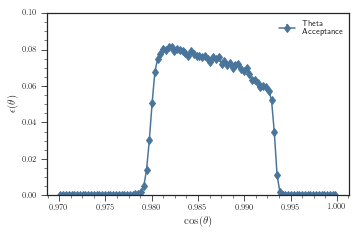

In [20]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(data.theta_x,
            data.r_theta.fillna(0),
            yerr=data.r_theta_err.fillna(0), color=sns.xkcd_rgb['dull blue'],
            capsize=0.5, 
            capthick=0.2, 
            marker='d', 
            label='Theta \nAcceptance')
ax.set_xlabel('$\cos(\\theta)$')
ax.set_ylabel('$\epsilon(\\theta)$')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_ylim(0.0, 0.1)
ax.legend(loc='upper right')
plt.savefig('plots/Qweak_Aluminum_Theta_Acceptance.png', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Theta_Acceptance.pgf', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Theta_Acceptance.pdf', bbox_inches='tight')
plt.show()

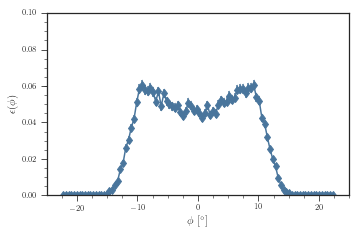

In [23]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(data.phi_x,
            data.r_phi.fillna(0),
            yerr=data.r_phi_err.fillna(0), color=sns.xkcd_rgb['dull blue'],
            capsize=0.5, 
            capthick=0.2, 
            marker='d', 
            label='Phi \nAcceptance')
ax.set_xlabel('$\phi$ $[^{\circ}]$')
ax.set_ylabel('$\epsilon(\phi)$')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_xlim(-25.0, 25.0)
ax.set_ylim(0.0, 0.1)
plt.savefig('plots/Qweak_Aluminum_Phi_Acceptance.png', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Phi_Acceptance.pgf', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Phi_Acceptance.pdf', bbox_inches='tight')
plt.show()

In [15]:
data.r_nu.fillna(0)

0     0.347747
1     0.345232
2     0.346105
3     0.340962
4     0.333533
5     0.331066
6     0.329665
7     0.323263
8     0.300368
9     0.260428
10    0.207940
11    0.157133
12    0.111563
13    0.083169
14    0.058407
15    0.041028
16    0.027785
17    0.018398
18    0.011354
19    0.006636
20    0.004275
21    0.003103
22    0.001505
23    0.000866
24    0.001184
25    0.001367
26    0.001077
27    0.000964
28    0.001078
29    0.001382
        ...   
70    0.000076
71    0.000113
72    0.000056
73    0.000132
74    0.000056
75    0.000112
76    0.000056
77    0.000037
78    0.000000
79    0.000000
80    0.000019
81    0.000037
82    0.000037
83    0.000019
84    0.000019
85    0.000000
86    0.000000
87    0.000019
88    0.000000
89    0.000018
90    0.000000
91    0.000000
92    0.000000
93    0.000000
94    0.000000
95    0.000000
96    0.000000
97    0.000000
98    0.000000
99    0.000000
Name: r_nu, Length: 100, dtype: float64

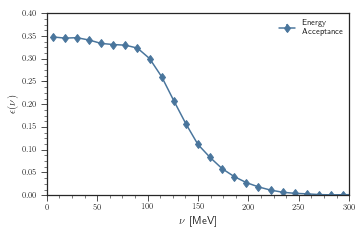

In [17]:
fig, ax = plt.subplots(figsize=figsize(0.9))
ax.errorbar(data.nu_x, 
            data.r_nu.fillna(0), 
            yerr=data.r_nu_err.fillna(0), 
            color=sns.xkcd_rgb['dull blue'], 
            capsize=0.5, 
            capthick=0.2, 
            marker='d', 
            label='Energy \nAcceptance')
ax.set_xlabel('$\\nu$ [MeV]')
ax.set_ylabel('$\epsilon(\\nu)$')
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.set_xlim(0.0, 300.0)
ax.set_ylim(0.0, 0.4)
ax.legend(loc='upper right')
plt.savefig('plots/Qweak_Aluminum_Nu_Acceptance.png', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Nu_Acceptance.pgf', bbox_inches='tight')
plt.savefig('plots/Qweak_Aluminum_Nu_Acceptance.pdf', bbox_inches='tight')
plt.show()

In [ ]:
theta_phi = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_phi.csv', header=0, index_col=0)
theta_phi_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_phi_cut.csv', header=0, index_col=0)
theta_nu = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_nu.csv', header=0, index_col=0)
theta_nu_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_theta_nu_cut.csv', header=0, index_col=0)
phi_nu = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_phi_nu.csv', header=0, index_col=0)
phi_nu_cut = pd.read_csv('data/Al_Alloy_4p_DS_acceptance_2d_bins_phi_nu_cut.csv', header=0, index_col=0)

In [ ]:
phi_nu_cut.head()

In [ ]:
theta_phi_cut.head()

In [ ]:
ratio_theta_phi = theta_phi_cut/theta_phi
ratio_theta_nu = theta_nu_cut/theta_nu
ratio_phi_nu = phi_nu_cut/phi_nu

In [ ]:
ratio_theta_phi.head()

In [ ]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_theta_phi.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues' , cbar_kws={'label' : '$\epsilon(\\theta,\phi)$'})
pp.xlabel('$\cos(\\theta)$')
pp.ylabel('$\phi$ $[^{\circ}]$')
pp.savefig('plots/Qweak_Aluminum_Theta_Phi_Acceptance.png', bbox_inches='tight')
pp.show()

In [ ]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_theta_nu.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues', cbar_kws={'label' : '$\epsilon(\\theta,\\nu)$'})
pp.xlabel('$\cos(\\theta)$')
pp.ylabel('$\\nu$ [MeV]')
pp.savefig('plots/Qweak_Aluminum_Theta_Nu_Acceptance.png', bbox_inches='tight')
pp.show()

In [ ]:
fig = pp.figure()
ax = pp.subplot(1, 1, 1)
sns.heatmap(ratio_phi_nu.fillna(0), xticklabels=9, yticklabels=9, cmap='Blues', cbar_kws={'label' : '$\epsilon(\phi,\\nu)$'})
pp.xlabel('$\phi$ $[^{\circ}]$')
pp.ylabel('$\\nu$ [MeV]')
pp.savefig('plots/Qweak_Aluminum_Phi_Nu_Acceptance.png', bbox_inches='tight')
pp.show()

In [ ]:
ratio_theta_phi = ratio_theta_phi.fillna(0)
ratio_theta_nu = ratio_theta_nu.fillna(0)
ratio_phi_nu = ratio_phi_nu.fillna(0)

In [ ]:
ratio_theta_phi.to_csv('data/Qweak_Aluminum_Theta_Phi_Acceptance.csv')
ratio_theta_nu.to_csv('data/Qweak_Aluminum_Theta_Nu_Acceptance.csv')
ratio_phi_nu.to_csv('data/Qweak_Aluminum_Phi_Nu_Acceptance.csv')